<a href="https://colab.research.google.com/github/aathira55/DL-for-computer-vision/blob/main/DL_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import os

In [89]:
os.chdir('/content/drive/MyDrive/fdp')

In [90]:
#present working directory

In [91]:
import tensorflow as tf

In [93]:
mnist_data=tf.keras.datasets.mnist

In [127]:
(X_train,Y_train),(X_test,Y_test)= mnist_data.load_data()

In [128]:
X_train.shape

(60000, 28, 28)

In [129]:
Y_train.shape

(60000,)

In [130]:
X_test.shape

(10000, 28, 28)

In [131]:
Y_train[2]

4

In [132]:
import matplotlib.pyplot as plt

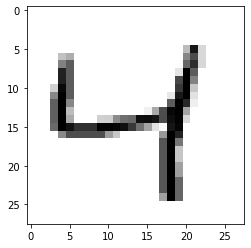

In [133]:
plt.imshow(X_train[2], cmap="binary")


In [134]:
import seaborn as sns

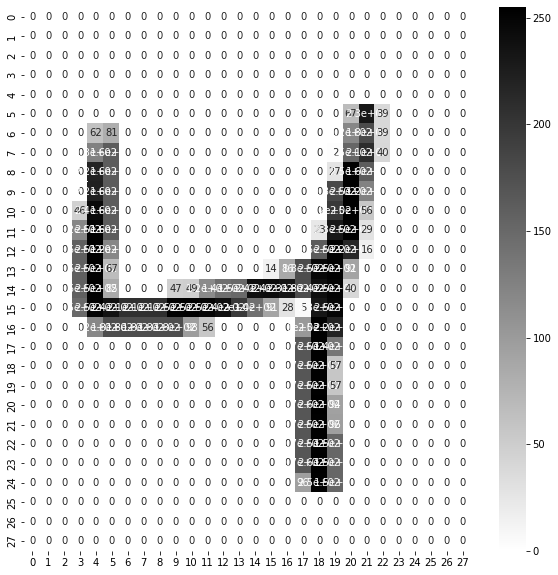

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[2],annot=True,cmap='binary')

In [136]:
X_train= X_train/255.
x_test=X_test/255.

In [137]:
X_valid,X_train=X_train[:5000],X_train[5000:]
Y_valid,Y_train=Y_train[:5000],Y_train[5000:]

In [138]:
X_train.shape

(55000, 28, 28)

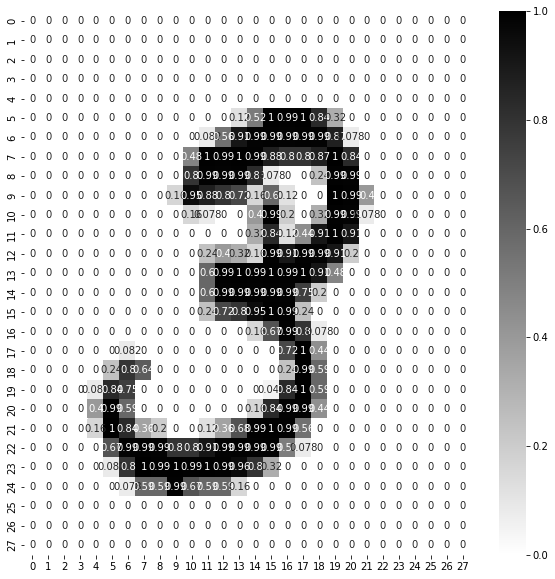

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train[1],annot=True,cmap='binary')

In [140]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

In [141]:
model1 = tf.keras.models.Sequential(LAYERS)

In [142]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [143]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="adam"
METRICS=["accuracy"]

In [144]:
model1.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER, metrics= METRICS)

In [145]:
model1.layers

In [146]:
model1.layers[0]

In [147]:
model1.layers[0].name

'inputlayer'

In [148]:
model1.layers[1]

In [149]:
model1.layers[1].name

'hiddenlayer1'

In [150]:
hidden1=model1.layers[1]
w,b= hidden1.get_weights()
w #weight

array([[-0.05621697, -0.06141345,  0.01406714, ..., -0.04043214,
         0.00109915, -0.04511799],
       [ 0.05363448,  0.05873315, -0.00687207, ..., -0.04242047,
        -0.00918099,  0.0358609 ],
       [ 0.03045882,  0.02872512, -0.02075531, ...,  0.00361737,
        -0.00712042,  0.01277055],
       ...,
       [-0.05365699, -0.05883417,  0.03905382, ..., -0.06651325,
        -0.00243791,  0.03068947],
       [-0.03349499, -0.02891769,  0.01549517, ...,  0.06509709,
        -0.04499967,  0.02253504],
       [ 0.04026549, -0.00471089, -0.01740231, ...,  0.04683505,
        -0.07172064, -0.04309516]], dtype=float32)

In [151]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [152]:
EPOCHS=15
VALIDATION_SET=(X_valid,Y_valid)

In [153]:
history= model1.fit(X_train,Y_train, epochs= EPOCHS, validation_data= VALIDATION_SET)

Epoch 1/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2173 - accuracy: 0.9358 - val_loss: 0.0989 - val_accuracy: 0.9724
Epoch 2/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9721 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9806 - val_loss: 0.0804 - val_accuracy: 0.9766
Epoch 4/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0421 - accuracy: 0.9857 - val_loss: 0.0766 - val_accuracy: 0.9784
Epoch 5/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0772 - val_accuracy: 0.9784
Epoch 6/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0779 - val_accuracy: 0.9806
Epoch 7/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0744 - val_accuracy:

In [154]:
prediction=model1.predict(X_test[0:2])

1/1 [==============================] - 0s 64ms/step


In [161]:
prediction

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [162]:
Y_test[0]

7

In [163]:
import numpy as np
np.argmax(prediction)

7

In [164]:
test_accuracy=model1.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 22.9941 - accuracy: 0.9790


In [165]:
test_accuracy #loss and accuracy
[17.311979293823242, 0.9760000109672546]

[17.311979293823242, 0.9760000109672546]